In [18]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
%matplotlib inline

import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [19]:
data=pd.read_csv('telecom_churn.csv')
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,-361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243553 entries, 0 to 243552
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   customer_id           243553 non-null  int64 
 1   telecom_partner       243553 non-null  object
 2   gender                243553 non-null  object
 3   age                   243553 non-null  int64 
 4   state                 243553 non-null  object
 5   city                  243553 non-null  object
 6   pincode               243553 non-null  int64 
 7   date_of_registration  243553 non-null  object
 8   num_dependents        243553 non-null  int64 
 9   estimated_salary      243553 non-null  int64 
 10  calls_made            243553 non-null  int64 
 11  sms_sent              243553 non-null  int64 
 12  data_used             243553 non-null  int64 
 13  churn                 243553 non-null  int64 
dtypes: int64(9), object(5)
memory usage: 26.0+ MB


In [21]:
data.describe()

,customer_id,age,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
count,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000,243553.000000
mean,121777.000000,46.077609,549501.270541,1.997500,85021.137839,49.010548,23.945404,4993.186025,0.200478
std,70307.839393,16.444029,259808.860574,1.414941,37508.963233,29.453556,14.733575,2942.019547,0.400359
min,1.000000,18.000000,100006.000000,0.000000,20000.000000,-10.000000,-5.000000,-987.000000,0.000000
25%,60889.000000,32.000000,324586.000000,1.000000,52585.000000,24.000000,11.000000,2490.000000,0.000000
50%,121777.000000,46.000000,548112.000000,2.000000,84990.000000,49.000000,24.000000,4987.000000,0.000000
75%,182665.000000,60.000000,774994.000000,3.000000,117488.000000,74.000000,36.000000,7493.000000,0.000000
max,243553.000000,74.000000,999987.000000,4.000000,149999.000000,108.000000,53.000000,10991.000000,1.000000


In [22]:
data.isnull().sum()

customer_id             0
telecom_partner         0
gender                  0
age                     0
state                   0
city                    0
pincode                 0
date_of_registration    0
num_dependents          0
estimated_salary        0
calls_made              0
sms_sent                0
data_used               0
churn                   0
dtype: int64

In [23]:
data.duplicated().sum()

0

In [24]:
data.shape

(243553, 14)

In [25]:
data.churn.value_counts()

0    194726
1     48827
Name: churn, dtype: int64

In [26]:
#Check for negative values in numeric columns
print("Negative values in columns:")
print((data[['calls_made', 'sms_sent', 'data_used']] < 0).sum())

Negative values in columns:
calls_made    6713
sms_sent      7375
data_used     6050
dtype: int64


In [27]:
#Convert negative values in usage_related columns to absolute values
for col in ['calls_made', 'sms_sent', 'data_used']:
    data[col] = data[col].abs()
    
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,Reliance Jio,F,25,Karnataka,Kolkata,755597,2020-01-01,4,124962,44,45,361,0
1,2,Reliance Jio,F,55,Mizoram,Mumbai,125926,2020-01-01,2,130556,62,39,5973,0
2,3,Vodafone,F,57,Arunachal Pradesh,Delhi,423976,2020-01-01,0,148828,49,24,193,1
3,4,BSNL,M,46,Tamil Nadu,Kolkata,522841,2020-01-01,1,38722,80,25,9377,1
4,5,BSNL,F,26,Tripura,Delhi,740247,2020-01-01,2,55098,78,15,1393,0


# Exploratory Data Analysis

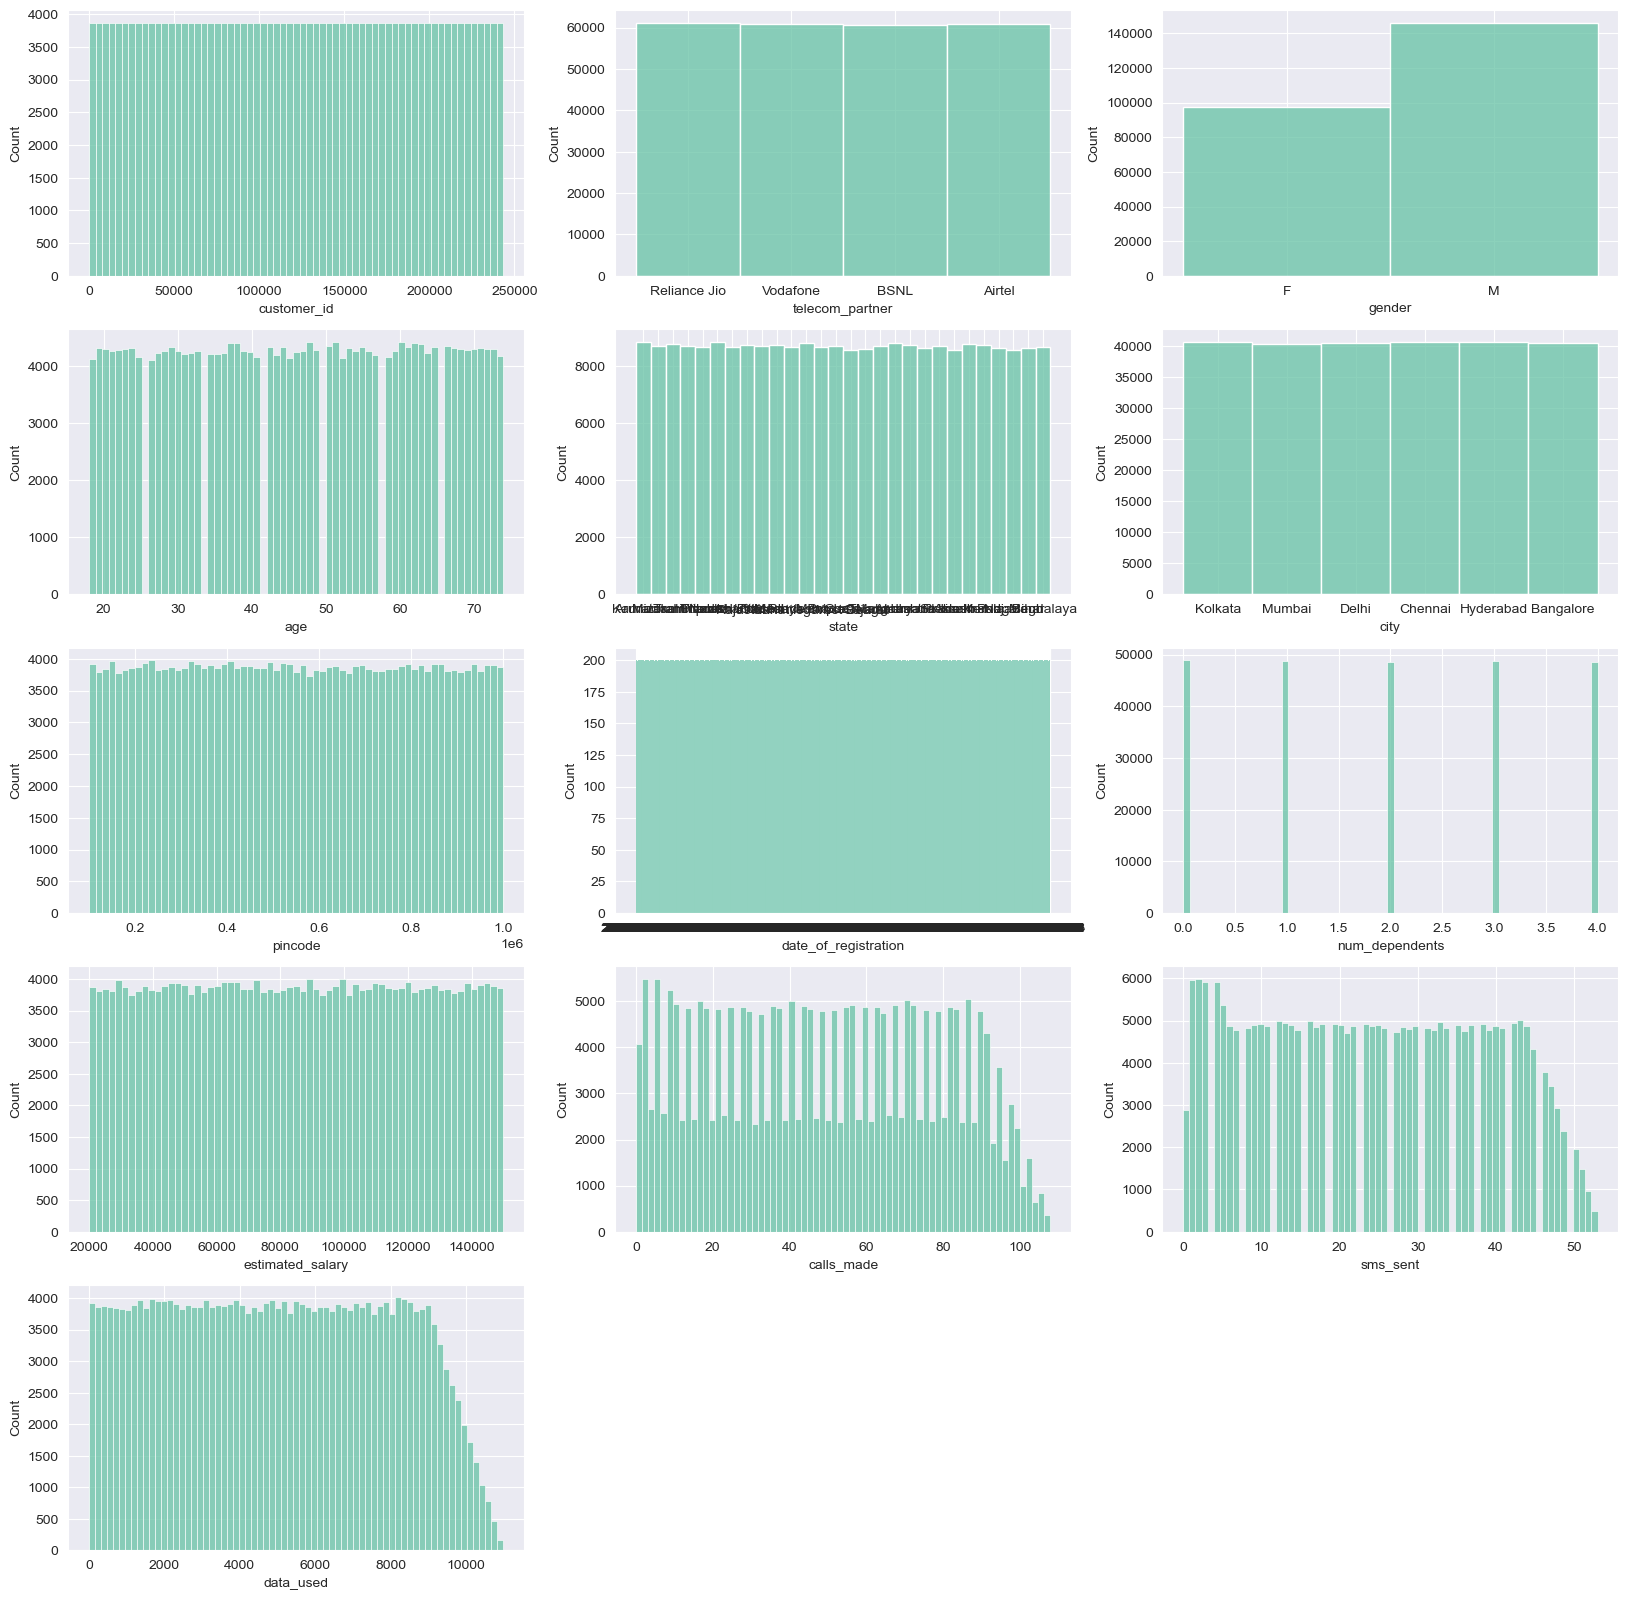

In [28]:
plt.figure(figsize=(20,20))
i=1
for col in data.columns[:-1]:
    plt.subplot(5,3,i)
    sns.histplot(data[col])
    i=i+1

# Churn Distribution by telecom_partner

In [29]:
churn_data=data[data['churn']==1]['telecom_partner']
non_churn_data=data[data['churn']==0]['telecom_partner']

churn_data

2             Vodafone
3                 BSNL
7                 BSNL
10              Airtel
16            Vodafone
              ...     
243523    Reliance Jio
243527            BSNL
243529    Reliance Jio
243533    Reliance Jio
243535            BSNL
Name: telecom_partner, Length: 48827, dtype: object

In [30]:
company_names=list(churn_data.value_counts().keys())
company_names

['Airtel', 'Reliance Jio', 'Vodafone', 'BSNL']

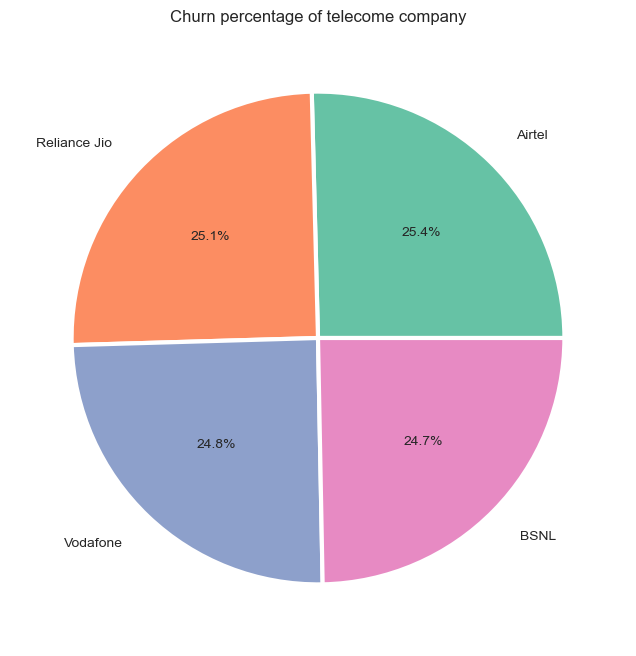

In [31]:
plt.figure(figsize=(10,8))
company_churn_values=list(churn_data.value_counts())
plt.pie(company_churn_values,labels=company_names,
       autopct='%.1f%%',labeldistance=1.15,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Churn percentage of telecome company")
plt.show()

# Churn Distribution by gender

In [32]:
churn_data_gender=data[data['churn']==1]['gender']
non_churn_data_gender=data[data['churn']==0]['gender']

In [33]:
gender_value=list(churn_data_gender.value_counts())
genders=['Male',"female"]

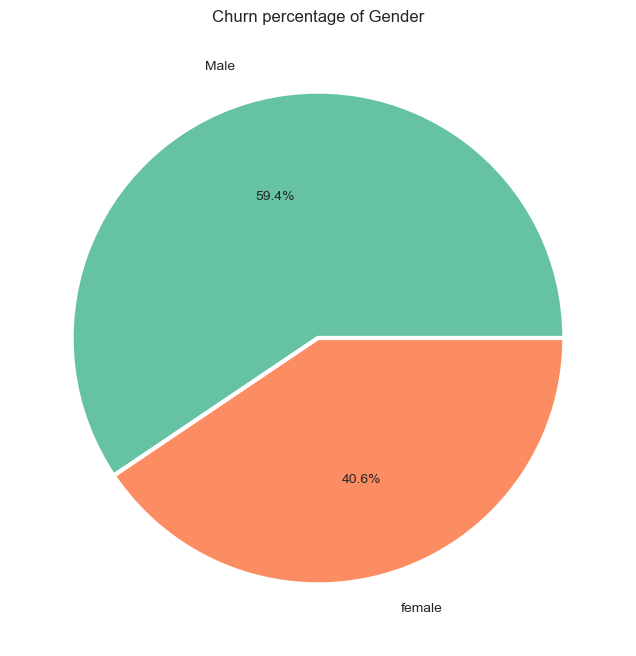

In [34]:
plt.figure(figsize=(10,8))
plt.pie(

gender_value,
autopct='%.1f%%',
labels=genders,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of Gender")
plt.show()

# Distribution of age by Churn

In [36]:
churn_age=data[data['churn']==1]['age']
nonchurn_age=data[data['churn']==0]['age']

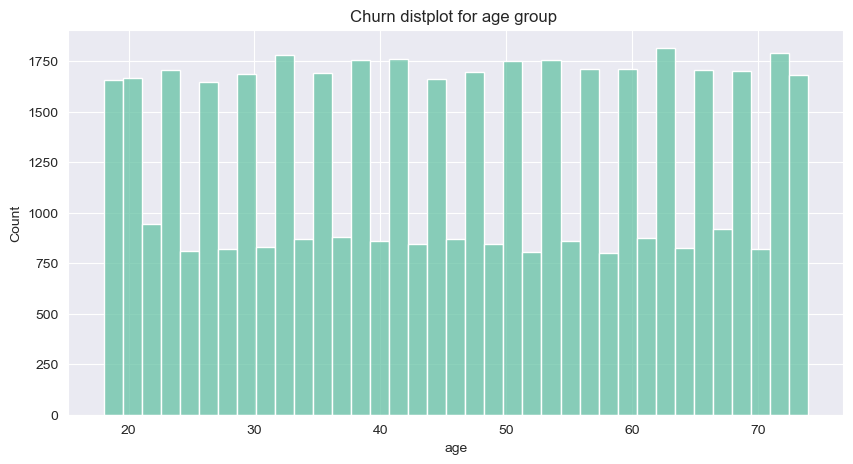

In [37]:
plt.figure(figsize=(10,5))
sns.histplot(churn_age)
plt.title("Churn distplot for age group ")
plt.show()

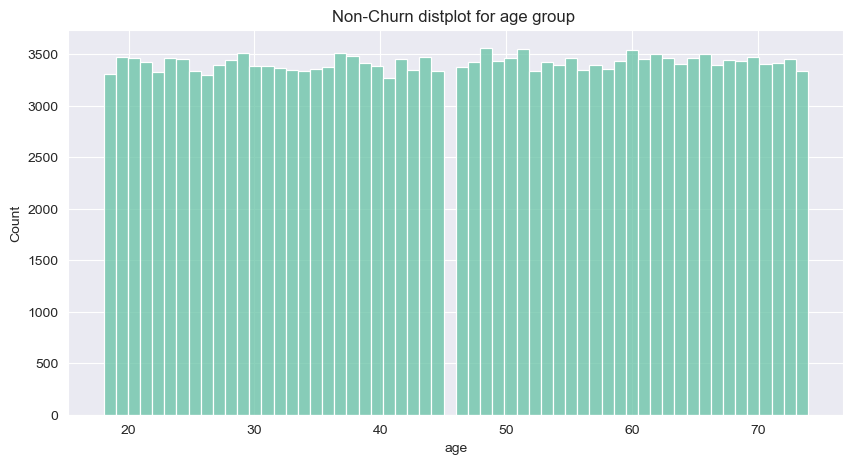

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(nonchurn_age)
plt.title("Non-Churn distplot for age group ")
plt.show()

# Distribution of estimated_salary by Churn

In [39]:
churn_salary=data[data['churn']==1]['estimated_salary']
nonchurn_salary=data[data['churn']==0]['estimated_salary']

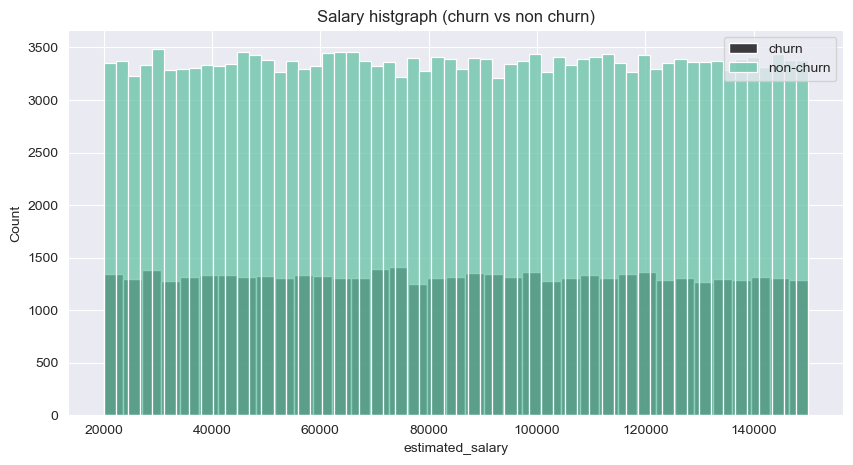

In [40]:
plt.figure(figsize=(10,5))
sns.histplot(churn_salary,label="churn",color="black")
sns.histplot(nonchurn_salary,label="non-churn")
plt.title("Salary histgraph (churn vs non churn)")
plt.legend()
plt.show()

# Churn Distribution by state

In [41]:
churn_data_state=data[data['churn']==1]['state']
non_churn_data_state=data[data['churn']==0]['state']

In [42]:
churn_value_state=list(churn_data_state.value_counts())
churn_value_state_keys=list(churn_data_state.value_counts().keys())

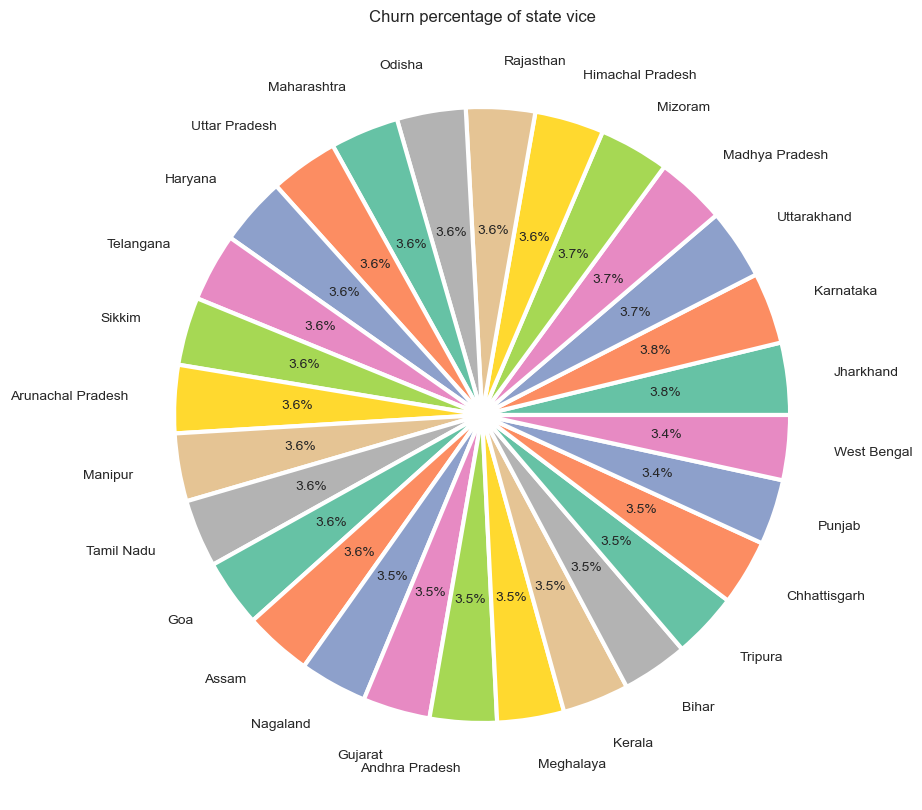

In [43]:
plt.figure(figsize=(20,10))
plt.pie(

churn_value_state,
autopct='%.1f%%',
labels=churn_value_state_keys,
labeldistance=1.15,
wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }

)
plt.title("Churn percentage of state vice")
plt.show()

# Distribution of calls_made by Churn

In [44]:
churn_data_calls_made=data[data['churn']==1]['calls_made']
non_churn_calls_made=data[data['churn']==0]['calls_made']

churn_value_calls_made=list(churn_data_calls_made.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_calls_made.value_counts().sort_values())

Text(0.5, 1.0, 'Histplot calls made churn customer')

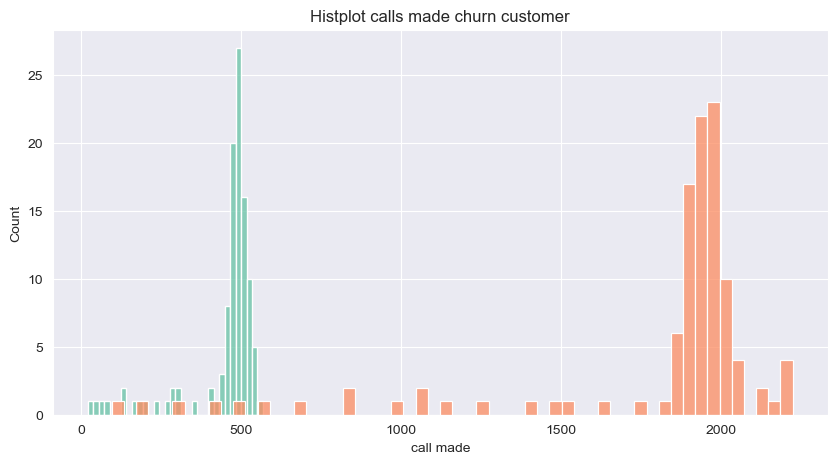

In [45]:
plt.figure(figsize=(10,5))
sns.histplot(churn_value_calls_made)
sns.histplot(non_churn_value_calls_made)
plt.xlabel("call made")
plt.title("Histplot calls made churn customer")

# Distribution of data_used by Churn

In [46]:
churn_data_data_used=data[data['churn']==1]['data_used']
non_churn_data_used=data[data['churn']==0]['data_used']

Text(0.5, 1.0, 'scatterplot data usage made churn  and non-churn customer')

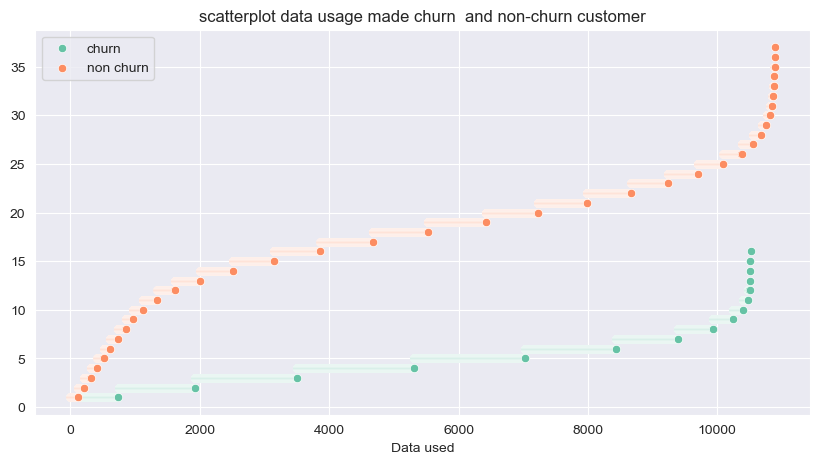

In [47]:
churn_value_calls_made=list(churn_data_data_used.value_counts().sort_values())
non_churn_value_calls_made=list(non_churn_data_used.value_counts().sort_values())
plt.figure(figsize=(10,5))
sns.scatterplot(churn_value_calls_made,label="churn")
sns.scatterplot(non_churn_value_calls_made,label="non churn")
plt.xlabel("Data used")
plt.title("scatterplot data usage made churn  and non-churn customer")

# Distribution of sms_sent by Churn

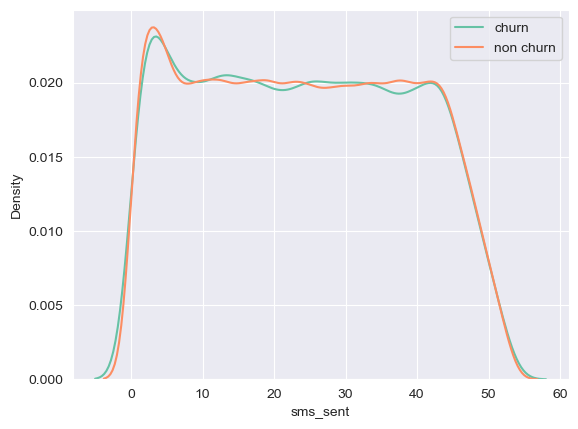

In [48]:
fig, ax = plt.subplots()
sns.kdeplot(data[data['churn'] == 1]['sms_sent'], label='churn', ax=ax)
sns.kdeplot(data[data['churn'] == 0]['sms_sent'], label='non churn', ax=ax)
ax.set_xlabel('sms_sent')
plt.legend()
plt.show()

# Correlation matrix

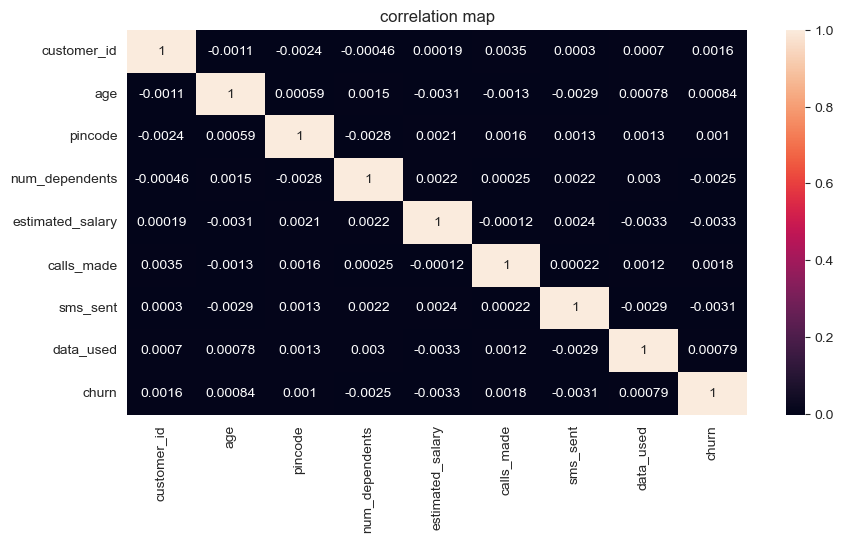

In [49]:
# Correlation matrix for numerical features

# Plotting the heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)
plt.title("correlation map")
plt.show()

# Data Preprocessing

# Label Encoding

In [50]:
from sklearn.preprocessing import LabelEncoder
model=LabelEncoder()
for i in data.columns:
    if data[i].dtype=="object":
        data[i]=model.fit_transform(data[i])

In [51]:
data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,date_of_registration,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn
0,1,2,0,25,10,4,755597,0,4,124962,44,45,361,0
1,2,2,0,55,16,5,125926,0,2,130556,62,39,5973,0
2,3,3,0,57,1,2,423976,0,0,148828,49,24,193,1
3,4,1,1,46,22,4,522841,0,1,38722,80,25,9377,1
4,5,1,0,26,24,2,740247,0,2,55098,78,15,1393,0


In [52]:
from datetime import datetime
#Convert date_of_registration to datetime and create new features(tenure (in days))
data['date_of_registration'] = pd.to_datetime(data['date_of_registration'])
#Calculate customer lifrtime 
data['tenure_days'] = (pd.to_datetime("2025-02-04") - data['date_of_registration']).dt.days
data = data.drop('date_of_registration', axis=1)

data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days
0,1,2,0,25,10,4,755597,4,124962,44,45,361,0,20123
1,2,2,0,55,16,5,125926,2,130556,62,39,5973,0,20123
2,3,3,0,57,1,2,423976,0,148828,49,24,193,1,20123
3,4,1,1,46,22,4,522841,1,38722,80,25,9377,1,20123
4,5,1,0,26,24,2,740247,2,55098,78,15,1393,0,20123


In [53]:
#Total Usage: Sum of calls_made, sms_sent, and data_used
# We assume that 'calls_made', 'sms_sent', and 'data_used' are numerical columns
data['total_usage'] = data['calls_made'] + data['sms_sent'] + data['data_used']#

In [54]:
#Usage per Day: Calculate the average daily usage
# Avoid division by zero by handling customers with tenure of 0 days (if any)
data['usage_per_day'] = data['total_usage'] / data['tenure_days']

data.head()

,customer_id,telecom_partner,gender,age,state,city,pincode,num_dependents,estimated_salary,calls_made,sms_sent,data_used,churn,tenure_days,total_usage,usage_per_day
0,1,2,0,25,10,4,755597,4,124962,44,45,361,0,20123,450,0.022362
1,2,2,0,55,16,5,125926,2,130556,62,39,5973,0,20123,6074,0.301844
2,3,3,0,57,1,2,423976,0,148828,49,24,193,1,20123,266,0.013219
3,4,1,1,46,22,4,522841,1,38722,80,25,9377,1,20123,9482,0.471202
4,5,1,0,26,24,2,740247,2,55098,78,15,1393,0,20123,1486,0.073846


In [55]:
data=data.drop("customer_id",axis=1)

In [56]:
# Save the processed data for further use or export
data.to_csv('Processed_Telecom_Churn.csv', index=False)